<a href="https://colab.research.google.com/github/ivychung/plant-ML/blob/building-fist-cnn-model/Tomato1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
"""importing required libraries"""

# so that we can mount google drive
from google.colab import drive

# numerical computation and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# file manipulation
import zipfile
import os
import shutil

# load and show an image with Pillow
from PIL import Image

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
from numpy import asarray

# sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# tensorflow tools
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import *

In [115]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
# Extract the dataset zip file
dataset_name = 'PlantVillage'
drive_dataset_address = '/content/drive/Shareddrives/Anoushka && Ivy/Senior Design 2021_2022_Ivy and Anoushka/dataset/'
working_dataset_address = os.path.join('/tmp/', dataset_name)

zip_ref = zipfile.ZipFile(drive_dataset_address + dataset_name + '.zip', 'r')
zip_ref.extractall('/tmp/') # Extracts the files into the appropriate folder
zip_ref.close()

In [117]:
# Removes the __MACOSX file that comes with zipping a file on Mac
try:
  shutil.rmtree('/tmp/__MACOSX')
except:
  pass

In [118]:
# Function to extract all sub- file/directory names
def read_filenames(dir_path, file_bool = True):
  if file_bool: # list all files in the folder
    return [f for f in os.listdir(dir_path) \
            if os.path.isfile(os.path.join(dir_path, f))]
  if not file_bool: # list all subfolders in the folder
    return [f for f in os.listdir(dir_path) \
            if os.path.isdir(os.path.join(dir_path, f))]


In [119]:
# getting classes
classes = read_filenames(working_dataset_address,file_bool = False)
classes

['Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Late_blight',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato__Target_Spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_Bacterial_spot']

In [120]:
# global variables to keep track of how many classes we have
CLASS_SIZE = len(classes)

In [121]:
# Collect all image names
img_names = [read_filenames(os.path.join(working_dataset_address, classes[i])) for i in range(CLASS_SIZE)]

# Row length should be the number of classes
print("Row Length", len(img_names))

# collect each column length
row_lengths = []
for i in range(CLASS_SIZE):
  row_lengths.append(len(img_names[i]))

print("Column length", row_lengths)

Row Length 10
Column length [3209, 1909, 373, 952, 1771, 1000, 1591, 1404, 1676, 2127]


In [125]:
# checking image processing with one image
img_path = os.path.join(working_dataset_address, classes[0], img_names[0][1])

# reading the image
image = Image.open(img_path)

# summarize original image details
print("Original image details")
print(image.format)
print(image.size)
print(image.mode)

# convert image to numpy array of pixel values
data = asarray(image)

# summarize converted image details
print("\nImage in pixel values")
print(type(data))
print(data.shape)


# Checking that image data can be converted back to PIL format
image1 = Image.fromarray(data)
print("\nImage converted back to PIL image")
print(type(image1))
print(image1.size)
print(image1.mode)

Original image details
JPEG
(256, 256)
RGB

Image in pixel values
<class 'numpy.ndarray'>
(256, 256, 3)

Image converted back to PIL image
<class 'PIL.Image.Image'>
(256, 256)
RGB


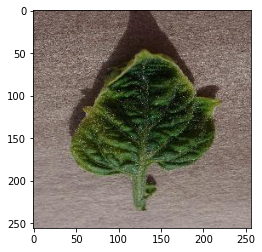

In [126]:
plt.imshow(data)
plt.show()

In [127]:
# making a np array of the images in pixel values
x = []
y = []

for i in range(CLASS_SIZE):
  for j in range(len(img_names[i])):
    img_path = os.path.join(working_dataset_address, classes[i], img_names[i][j])
    try:
      img = Image.open(img_path)
      data = asarray(img) # convert image to numpy array
      x.append(data)
      y.append(classes[i])
    except:
      pass

image_count = len(x)
print("Total image count:", image_count)
x = np.asarray(x)
y = np.asarray(y)
print(type(x))

Total image count: 16011
<class 'numpy.ndarray'>


Tomato_Bacterial_spot
Label is the one expected:  True
Equal amount of responses and predictors:  True 



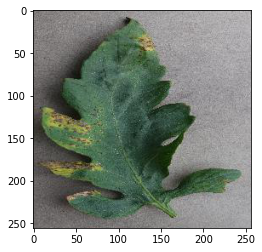

In [128]:
# comparing the last class label and the label of the last image
# since we are importing the images in order, they should match
print(classes[CLASS_SIZE-1])
print("Label is the one expected: ",y[len(y)-1] == classes[CLASS_SIZE-1])
print("Equal amount of responses and predictors: ",len(x)==len(y),"\n")

plt.imshow(x[len(y)-1])
plt.show()

In [129]:
# Now we need to split the data into a training and a validating dataset
x_train, x_test, y_train, y_test = train_test_split(x, y,
    test_size=0.2, shuffle = True, random_state = 8)

In [130]:
# Our x data vectors are dour-dimensional, just as we wanted
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
# We need to reshape our y data vectors
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (12808, 256, 256, 3)
x_test shape: (3203, 256, 256, 3)
y_train shape: (12808,)
y_test shape: (3203,)


In [131]:
# convert the labels be to int-encoded 
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, CLASS_SIZE)
y_test = keras.utils.to_categorical(y_test, CLASS_SIZE)


# check our final shape
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (12808, 256, 256, 3)
x_test shape: (3203, 256, 256, 3)
y_train shape: (12808, 10)
y_test shape: (3203, 10)


In [132]:
model = keras.Sequential(
    [
        Input(shape=x_train.shape[1:]),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(CLASS_SIZE, activation='softmax'),
    ],
    'CNN'
)

model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 246016)            0         
                                                                 
 dropout_2 (Dropout)         (None, 246016)            0       

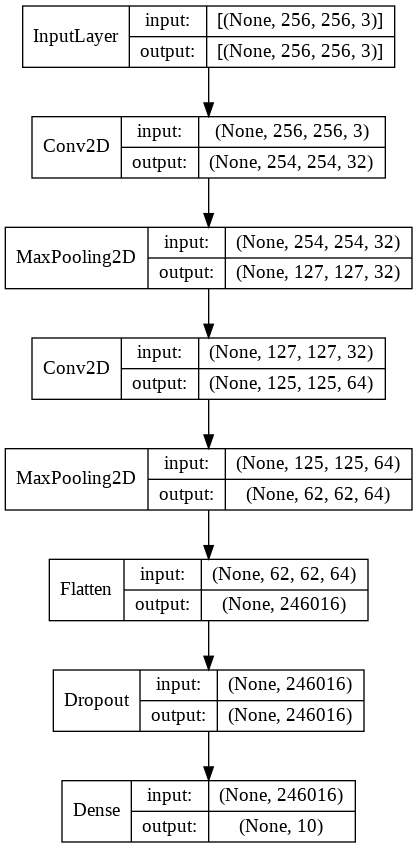

In [133]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [134]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
91/91 [==============================] - 33s 351ms/step - loss: 116.5174 - accuracy: 0.3142 - val_loss: 1.8253 - val_accuracy: 0.4223
Epoch 2/10
91/91 [==============================] - 31s 341ms/step - loss: 1.3657 - accuracy: 0.5704 - val_loss: 1.5403 - val_accuracy: 0.5035
Epoch 3/10
91/91 [==============================] - 31s 342ms/step - loss: 0.8555 - accuracy: 0.7308 - val_loss: 1.4837 - val_accuracy: 0.6315
Epoch 4/10
91/91 [==============================] - 31s 341ms/step - loss: 0.5691 - accuracy: 0.8225 - val_loss: 1.5614 - val_accuracy: 0.6073
Epoch 5/10
91/91 [==============================] - 31s 341ms/step - loss: 0.4517 - accuracy: 0.8662 - val_loss: 1.6736 - val_accuracy: 0.6393
Epoch 6/10
91/91 [==============================] - 31s 342ms/step - loss: 0.3698 - accuracy: 0.8886 - val_loss: 1.9235 - val_accuracy: 0.6565
Epoch 7/10
91/91 [==============================] - 31s 344ms/step - loss: 0.3059 - accuracy: 0.9060 - val_loss: 5.1451 - val_accuracy: 0.43

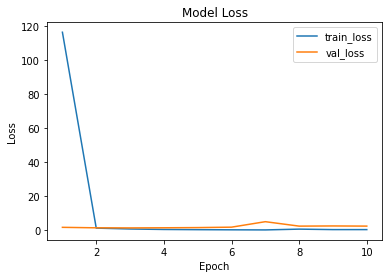

In [135]:
plt.plot(np.linspace(1, 10, 10), history.history['loss'], label='train_loss')
plt.plot(np.linspace(1, 10, 10), history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

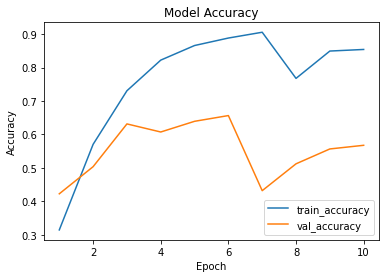

In [136]:
plt.plot(np.linspace(1, 10, 10), history.history['accuracy'], label='train_accuracy')
plt.plot(np.linspace(1, 10, 10), history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [142]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.093014717102051
Test accuracy: 0.5985013842582703


In [141]:
# testing saving trained model 
save_path = '/content/drive/Shareddrives/Anoushka && Ivy/Senior Design 2021_2022_Ivy and Anoushka/Trained Models/'
model.save(save_path)

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Anoushka && Ivy/Senior Design 2021_2022_Ivy and Anoushka/Trained Models/assets


In [143]:
# testing loading model
model = keras.models.load_model(save_path)
model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 246016)            0         
                                                                 
 dropout_2 (Dropout)         (None, 246016)            0       